In [19]:
#All the following script and comments have been made in accordance to Merged heart data##

#Importing packages # Make sure that you activate correct environment 
import pandas as pd
import scanpy as sc
import os
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

#writing output file
results_file = "./outputs/trail/clean_data_scanpy.h5ad"

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.4 scipy==1.12.0 pandas==2.2.1 scikit-learn==1.4.1.post1 statsmodels==0.14.1 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [2]:
#Reading the h5ad file
clean_data = sc.read_h5ad("/Users/srivalli/Desktop/SCA-Uni/Single-cell-data-analysis/Cardiac_cell_analysis/outputs/merged_heart.h5ad")
clean_data

AnnData object with n_obs × n_vars = 1190430 × 66270
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'sex', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used', 'sangerID', 'combinedID', 'donor_type', 'region_finest', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    obsm: 'X_pca', 'X_scArches', 'X_umap'

In [3]:
# Identify duplicated cells based on their annotation information
duplicated_cell_names = clean_data.obs.index[clean_data.obs.duplicated()]

# Print the names of duplicated cells
print("Duplicated cell names:")
print(duplicated_cell_names)

# Identify duplicated cells based on their annotation information
duplicated_cells = clean_data.obs.duplicated()

# Filter out duplicated cells
adata = clean_data[~duplicated_cells, :]

# Check the size of the dataset before and after deduplication
print("Size before deduplication:", clean_data.shape)

# Remove any cells with zero genes after deduplication (optional)
clean_data = adata[adata.obs.n_genes_by_counts > 0, :]

# Check the size of the dataset after removing cells with zero genes
print("Size after deduplication:", clean_data.shape)

Duplicated cell names:
Index([], dtype='object')
Size before deduplication: (1190430, 66270)
Size after deduplication: (704296, 66270)


/Users/srivalli/conda/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:42)


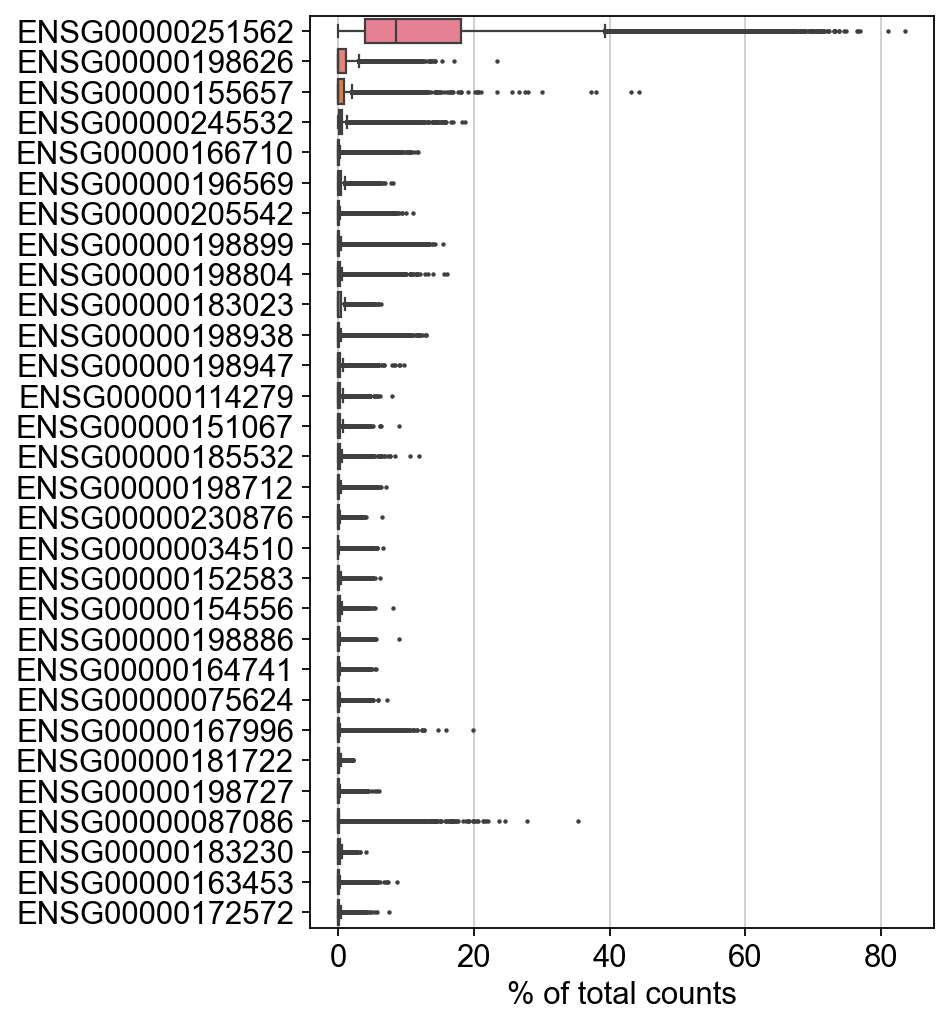

In [4]:
#PREPROCESSING#

#Viewing genes that contributes the largest portion in a cell
highest_expr_genes = sc.pl.highest_expr_genes(clean_data)

In [5]:
#Filtering genes and cells
sc.pp.filter_cells(clean_data, min_genes=200)
sc.pp.filter_genes(clean_data, min_cells=3)

#Above filtering considers only cells having min 200 genes as a primary criteria and filters the genes which are found in minimum of 3 cells

filtered out 1 cells that have less than 200 genes expressed
filtered out 34741 genes that are detected in less than 3 cells


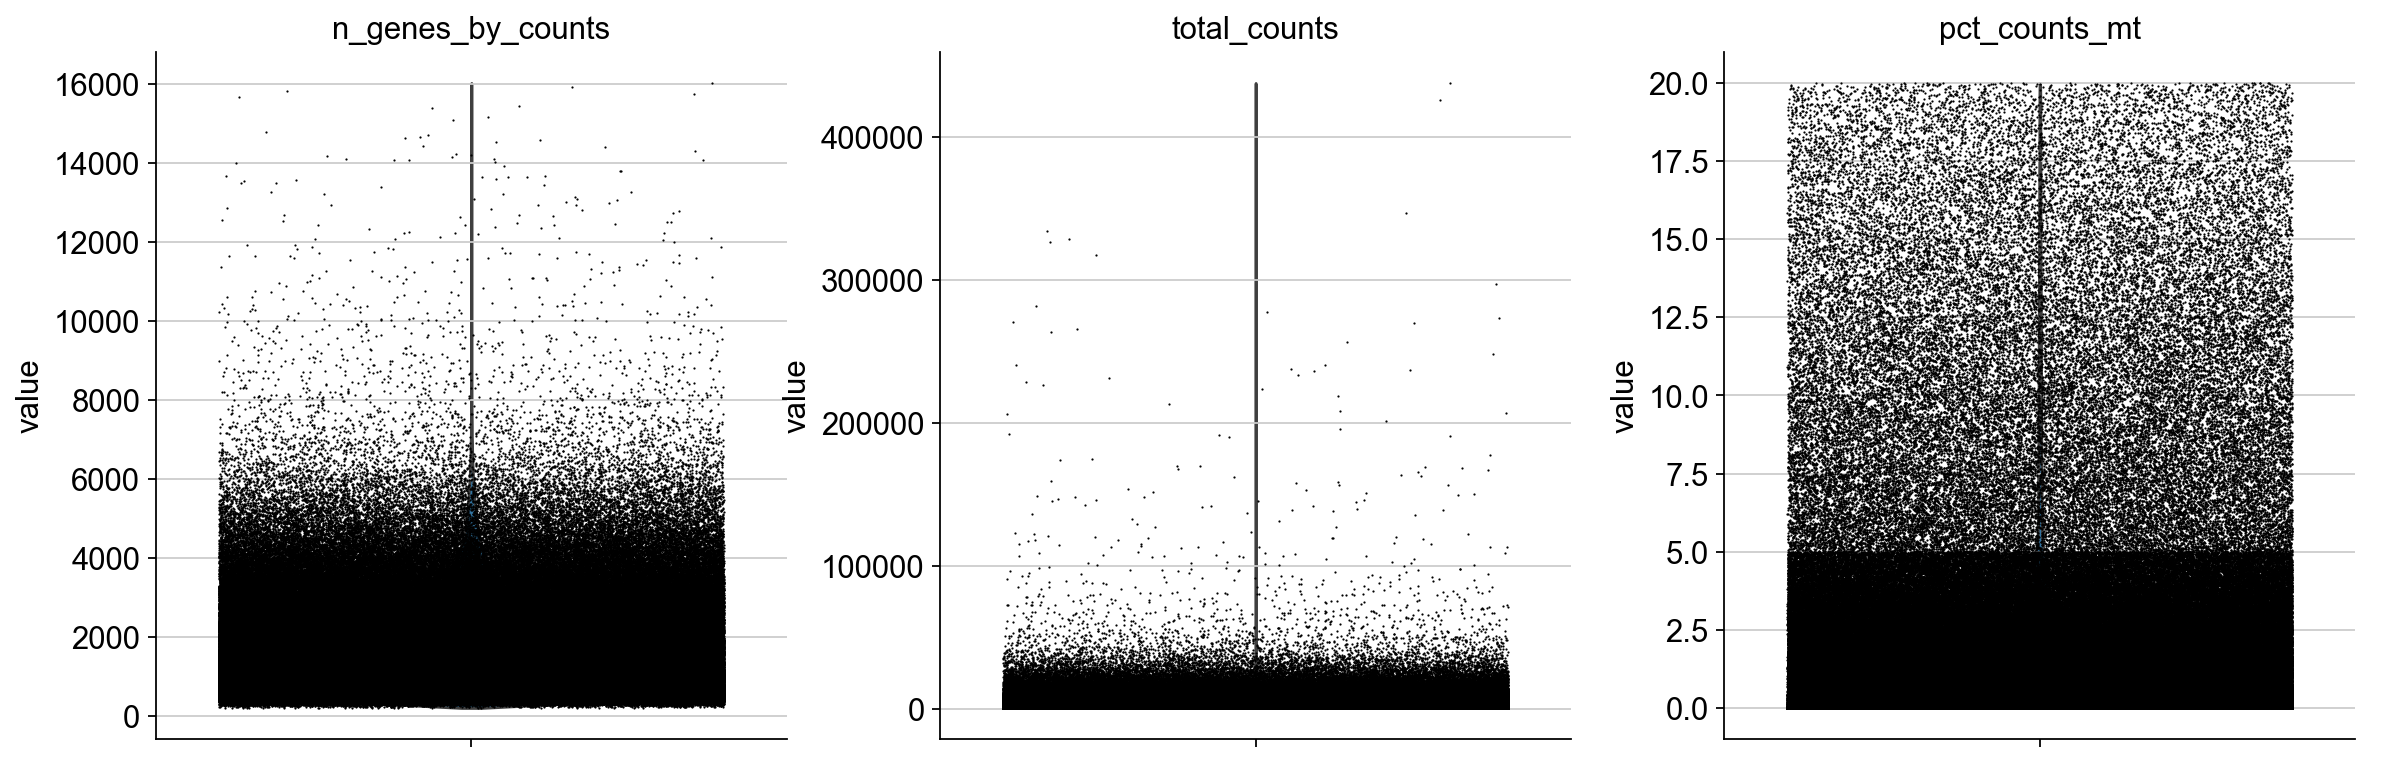

In [6]:
sc.pl.violin(clean_data,["n_genes_by_counts", "total_counts", "pct_counts_mt"],jitter=0.4,multi_panel=True)

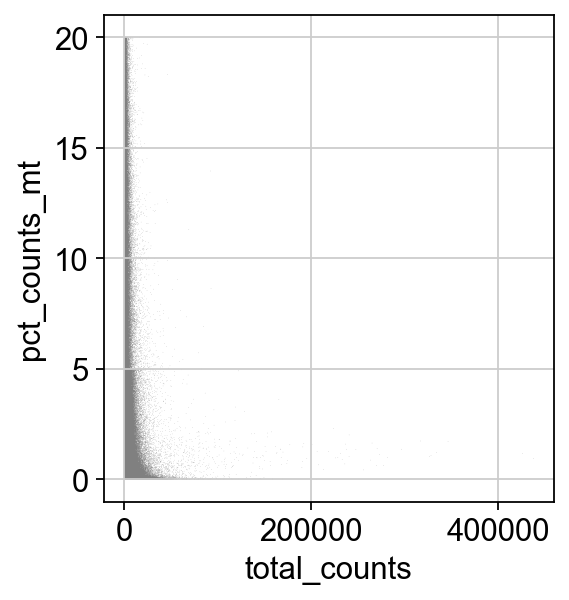

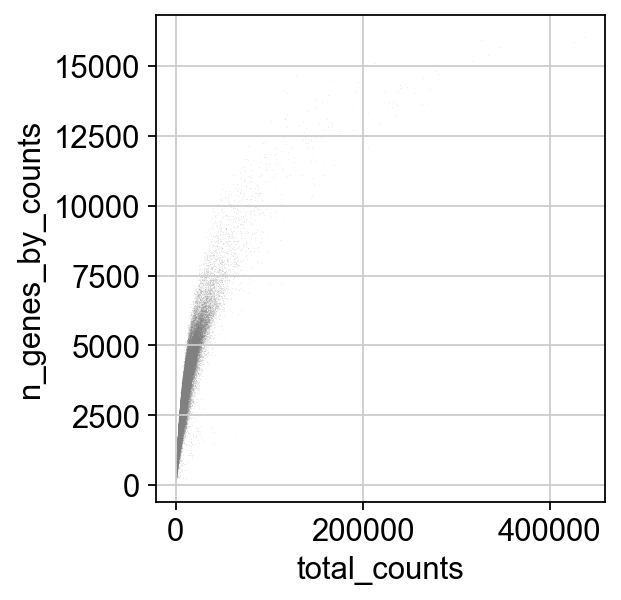

In [7]:
#Scatter plots
sc.pl.scatter(clean_data, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(clean_data, x="total_counts", y="n_genes_by_counts")

In [8]:
#Normalizing data matrix using CPM
sc.pp.normalize_total(clean_data,target_sum=1e6)

#Logarithmization of data
sc.pp.log1p(clean_data,base=2)

#Adddding to layers
clean_data.layers['normalized_log1p'] = clean_data.X.copy()

normalizing counts per cell
    finished (0:00:05)


extracting highly variable genes


/Users/srivalli/conda/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    finished (0:00:51)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


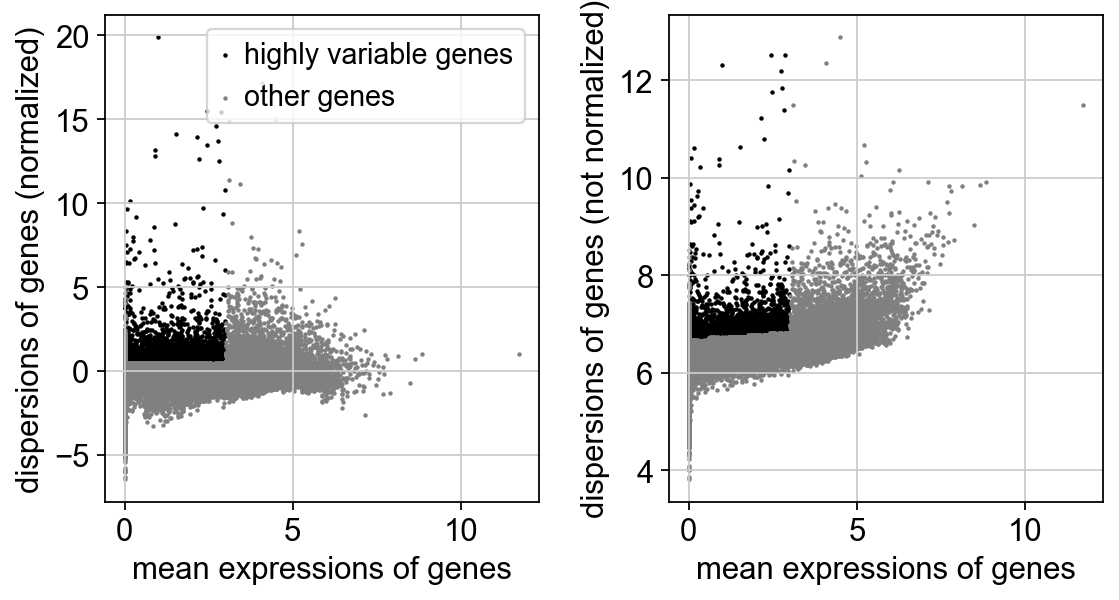

In [9]:
#Identifying high variable genes
sc.pp.highly_variable_genes(clean_data, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(clean_data)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:23)


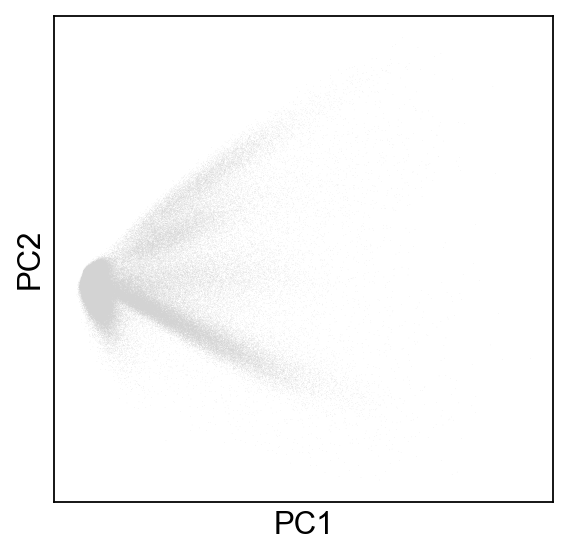

In [13]:
##PRINCIPAL COMPONENT ANALYSIS##

#Reducing dimensions
sc.tl.pca(clean_data, svd_solver="arpack")

#To view the principal components
clean_data.obsm['X_pca']

#Scatter plot for PCA components for visualization 
sc.pl.pca(clean_data)

In [15]:
#Scatter plot for PCA components for visualization based on coloring of genes
#sc.pl.pca(clean_data,color= "NKG7")

#FIND A GENE

In [17]:
#Number of PCs to be considered for the data
sc.tl.tsne(clean_data)

#To know the values and count of Principal components
clean_data.obsm['X_pca']

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (1:47:37)


array([[-1.5438626 ,  2.3527036 , -3.9819915 , ...,  2.0320773 ,
         3.3991146 , -2.082391  ],
       [-0.17381719,  2.8039997 , -2.764346  , ..., -0.49956483,
        -0.24854538, -0.9394322 ],
       [-1.121664  ,  3.1829545 , -3.228695  , ...,  0.7185009 ,
         1.0777204 , -0.51199967],
       ...,
       [-2.2856483 ,  0.2851611 , -0.46667343, ..., -1.1111952 ,
         4.2964997 ,  3.0858395 ],
       [ 4.2614684 , -0.25237513, -2.3646724 , ...,  0.4795448 ,
         0.07820481, -0.5384452 ],
       [ 1.3251792 , -0.80986   , -1.0566694 , ..., -1.2593869 ,
         0.03027783, -0.0658545 ]], dtype=float32)

In [21]:
ensg = clean_data.var_names

# Combine the current working directory with the file name
file_name = "ensembl_gene_ids.txt"
file_path = os.path.join("./outputs/trail/", file_name)


with open(file_path, 'w') as file:
    for ensgid in ensg:
        file.write(ensgid + '\n')

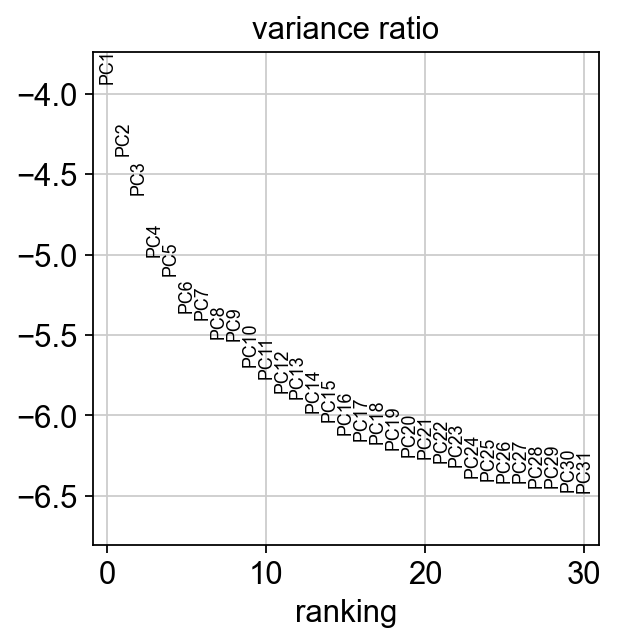

AnnData object with n_obs × n_vars = 704295 × 31529
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'sex', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used', 'sangerID', 'combinedID', 'donor_type', 'region_finest', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [22]:
#Estimates of Principal components contribution to the total variance of the data
sc.pl.pca_variance_ratio(clean_data, log=True)

#Saving results
clean_data.write(results_file)
clean_data

In [23]:
#COMPUTING NEIGHBOUIRHOOD GRAPH#

#General method
#sc.pp.neighbors(clean_data)
#clean_data
#Can add n_neighbors and n_pca parameters if we would like to consider making clusters based on given params#

#NOT USING THIS

computing neighbors
    using 'X_pca' with n_pcs = 50


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


SystemError: CPUDispatcher(<function nn_descent at 0x28b634680>) returned a result with an exception set

In [32]:
#Computing neighbors by bbknn - Batch balanced KNN

bbknn_data = sc.external.pp.bbknn(clean_data)

bbknn_data

#We use bbknn only for our analysis

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:06:09)


In [34]:
#EMBEDDING THE NEIGHBOURHOOD GRAPH

#Assinging cells to clusters
sc.tl.louvain(clean_data)

#Partioning data and identifying relationships between clusters
sc.tl.paga(clean_data)
sc.pl.paga(clean_data)

#Data visualization
sc.tl.umap(clean_data)

#Giving colour codes for better visulauization based on genes
sc.pl.umap(clean_data, color=["louvain"])

running Louvain clustering
    using the "louvain" package of Traag (2017)


In [ ]:
#Ranking genes using wilcoxon method
sc.tl.rank_genes_groups(clean_data, "leiden", method="wilcoxon")

#Plotting 
sc.pl.rank_genes_groups(clean_data, n_genes=25, sharey=False)

#Saving data
clean_data.write(results_file)

In [ ]:
#Using logistic regression
sc.tl.rank_genes_groups(clean_data, "leiden", method="logreg", max_iter=100)
sc.pl.rank_genes_groups(clean_data, n_genes=25, sharey=False)

In [ ]:
#To get list of gene names across clusters
gene_clusters = pd.DataFrame(clean_data.uns["rank_genes_groups"]["names"])

gene_clusters.to_csv("./outputs/trail/gene_clusters.csv")
#Can add .head(10) at the end to give output of only 10 hits

In [ ]:
#Getting table with scores and group
clean_data = sc.read(results_file)
result = clean_data.uns["rank_genes_groups"]
groups = result["names"].dtype.names
scores = pd.DataFrame(
    {
        group + "_" + key[:1]: result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
)

scores.to_csv("./outputs/trail/scores.csv")
#low p-value indicates that the gene is likely differentially expressed in that cluster compared to others

In [ ]:
#Saving file
clean_data.write(results_file)